**JMJ+**

### Problem statement:
<br>


*  Help Porter to predict delivery time based on various features
*  Perform detailed analysis inorder to identify the impact of different factors
* Thereby, to improve the customer experience and business, by optimising aspects such as delivery time and manpower requirement 








In [2]:
from google.colab import files 
uploaded = files.upload()

Saving JMJ_Porter.csv to JMJ_Porter (1).csv


## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Reading data & basic checks](#Read_Data)**
	- 2.1 - [Observations from basic checks](#obs_basic)
3. **[Data preprocessing and feature engineering](#Data_pre)**
    - 3.1 -[Creating copy of the dataset](#copy)
    - 3.2 -[Handling null values - 1](#null_1)
    - 3.3 -[Extracting date based featues](#Ext_date)
	- 3.4 -[Observations from date & time](#Obs_date)
	- 3.5 -[Handling null values - 2](#null_2)
	- 3.6 -[Basic feature engineering](#bas_fe)	
4. **[Data visualization and cleaning](#Data_vis)**
	- 4.1 -[Check for outliers - boxplot](#outliers)
	- 4.2 -[Remove outliers - quantile technique](#outliers_rm)
	- 4.3 -[Visualization for various features](#data_vis)
5. **[Creating target feature (time taken for delivery)](#target)**
	- 5.1 -[Removing outliers - 'time_taken_min'](#outliers_target)
	- 5.2 -[Visualization based on delivery time](#del_vis)
6. **[Splitting data](#data_split)**
	- 6.1 -[Test-Train split](#t_t_split)
	- 6.2 -[Frequency encoding non-numerical features(Training & Testing)](#freq_enc)
7. **[Model building - Random Forest](#mod_rf)**
	- 7.1 -[Evaluation of Random Forest model](#rf_eval)
8. **[Regression with neural networks](#nn_reg)**
	- 8.1 -[Creating training & testing dataset for NN](#nn_t_t)
	- 8.2 -[Encoding numerical categorical features](#nn_enc)
	- 8.3 -[Scaling the data](#nn_scl)
	- 8.4 -[Model building - NN](#nn_model)
	- 8.5 -[NN Model architecture](#nn_arch)
	- 8.6 -[NN Model evaluation](#nn_eval)
	- 8.7 -[NN Model prediction](#nn_pred)
	- 8.8 -[Comparison of RF and NN model](#comp)
9. **[Insights & Recommendations](#ins_rec)**

### 1. Import Libraries <a id='import_lib'></a>

In [6]:
import pandas as pd
import numpy as np

import io

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_percentage_error as mape,
                             mean_squared_error as mse, 
                             mean_absolute_error as mae)

from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import (mean_squared_error,mean_absolute_percentage_error,mean_absolute_error)
from tensorflow.keras.utils import plot_model


import warnings
warnings.filterwarnings('ignore')

### 2. Reading data & basic checks <a id='Read_Data'></a> 

In [7]:
df = pd.read_csv(io.BytesIO(uploaded['JMJ_Porter.csv']))
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [8]:
# Shape

df.shape

(197428, 14)

In [9]:
# Basic info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [10]:
# Calculating missing percent:

missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': np.round(((df.isnull().sum() / len(df))*100),3)
})

missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
total_onshift_partners,16262,8.237
total_busy_partners,16262,8.237
total_outstanding_orders,16262,8.237
store_primary_category,4760,2.411
order_protocol,995,0.504
market_id,987,0.500
actual_delivery_time,7,0.004
created_at,0,0.000
store_id,0,0.000
total_items,0,0.000


In [11]:
# Checking duplicate count  

df.duplicated().sum()

0

In [12]:
# Checking unique values of different features

df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

### 2.1 Observations from basic checks <a id='obs_basic'></a>
<br>
1. Large dataset with shape : (197428, 14)
<br>
2. Datatypes are : int, float and object 
<br>
3. Time related features needs to be converted into datetime feature
<br>
4. 6 features contains null values and needs to be handled
<br>
5. There are no duplicate rows in the dataset

### 3. Data Preprocessing & Feature Engineering <a id='Data_pre'></a>

**3.1 Creating copy of the dataset** <a id='copy'></a>

In [13]:
df_copy=df.copy()


**3.2 Handling null values - 1** <a id='null_1'></a>

In [14]:
# Filling the null values with 'other'
df['store_primary_category'].fillna('other',inplace=True)

# Filling 'order_protocol'
df['order_protocol'].fillna(8.0,inplace=True)

# Filling 'market_id'
df['market_id'].fillna(7.0,inplace=True)

# Removing null values from 'actual_delivery_time'
df=df[~df['actual_delivery_time'].isnull()]

**3.3 Extracting date based featues <a id='Ext_date'></a>**

In [15]:
# Converting into datetime format:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Extracting hour
df['created_hr'] = df['created_at'].dt.hour
df['delivery_hr']=df['actual_delivery_time'].dt.hour


# Extracting year
df['delivery_year'] = df['actual_delivery_time'].dt.year
df['created_year'] = df['created_at'].dt.year

# Extracting month
df['delivery_month'] = df['actual_delivery_time'].dt.month
df['created_month'] = df['created_at'].dt.month

# Extracting date
df['delivery_date']= df['actual_delivery_time'].dt.day
df['created_date'] = df['created_at'].dt.day

# Extracting dayofweek
df['delivery_day']= df['actual_delivery_time'].dt.dayofweek
df['created_day'] = df['created_at'].dt.dayofweek

**3.4 Observations from date & time <a id='#Obs_date'></a>**
<br>
1. The data is available for the year 2015 
2. The delivery details for the month of Jan and Feb is present

**3.5 Handling null values - 2 <a id='#null_2'></a>**

In [16]:
# Handling 'total_busy_partners'

dict1 = df.groupby(by='delivery_hr').median()['total_busy_partners'].to_dict()
df['total_busy_partners'].fillna(df['delivery_hr'].map(dict1),inplace=True)

# Handling 'total_onshift_partners'

dict2 = df.groupby(by='delivery_hr').median()['total_onshift_partners'].to_dict()
df['total_onshift_partners'].fillna(df['delivery_hr'].map(dict2),inplace=True)

# Handling 'total_outstanding_orders'

dict3 = df.groupby(by='delivery_hr').median()['total_outstanding_orders'].to_dict()
df['total_outstanding_orders'].fillna(df['delivery_hr'].map(dict3),inplace=True)

In [17]:
# Checking the count of null values

df.isna().sum().sum()

0

**3.6 Basic feature engineering <a id='bas_fe'></a>**

In [18]:
# Replacing day number with name
df.replace({'delivery_day':{0:  "Mon",
                      1:  "Tue",
                      2:  "Wed",
                      3:  "Thu",
                      4:  "Fri",
                      5:  "Sat",
                      6:  "Sun"}}, inplace=True)

# Replacing month number with name
df.replace({'delivery_month':{1:  "Jan",
                      2:  "Feb"}}, inplace=True)

In [19]:
# Checking the extracted features

df.loc[:3,['actual_delivery_time','delivery_hr','delivery_year','delivery_month','delivery_day']]

,actual_delivery_time,delivery_hr,delivery_year,delivery_month,delivery_day
0,2015-02-06 23:27:16,23,2015,Feb,Fri
1,2015-02-10 22:56:29,22,2015,Feb,Tue
2,2015-01-22 21:09:09,21,2015,Jan,Thu
3,2015-02-03 22:13:00,22,2015,Feb,Tue


### 4. Data visualization and cleaning <a id='Data_vis'></a>

**4.1 Check for outliers - boxplot <a id='outliers'></a>**

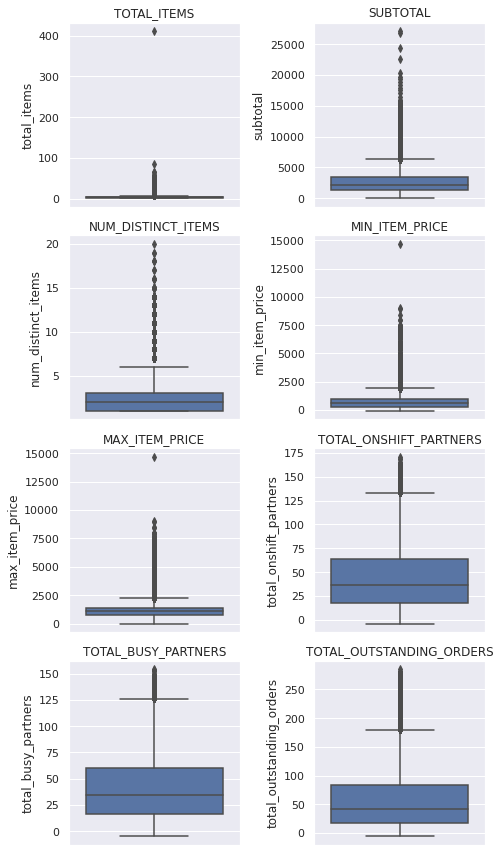

In [20]:
# Generating boxplot for numerical features

num_cols=['total_items','subtotal','num_distinct_items','min_item_price',
          'max_item_price','total_onshift_partners','total_busy_partners',
          'total_outstanding_orders']

plt.figure(figsize=(7,12))
sns.set(style='darkgrid')

for i, variable in enumerate(num_cols):
    plt.subplot(4,2,i+1)
    ax=sns.boxplot(data=df,y=df[variable])
    
    plt.tight_layout()
    plt.title(num_cols[i].upper())

**4.2 Remove outliers <a id='outliers_rm'></a>**

In [21]:
# Clipping on the basis of percentile:

q1=df['total_items'].quantile(0.9999)
q2=df['subtotal'].quantile(0.9999)
q3=df['min_item_price'].quantile(0.9999)
q4=df['max_item_price'].quantile(0.9999)

df = df[df['total_items']<q1]
df = df[df['subtotal']<q2]
df = df[df['min_item_price']<q3]
df = df[df['max_item_price']<q4]

**4.3 Visualization for various features <a id='data_vis'></a>**

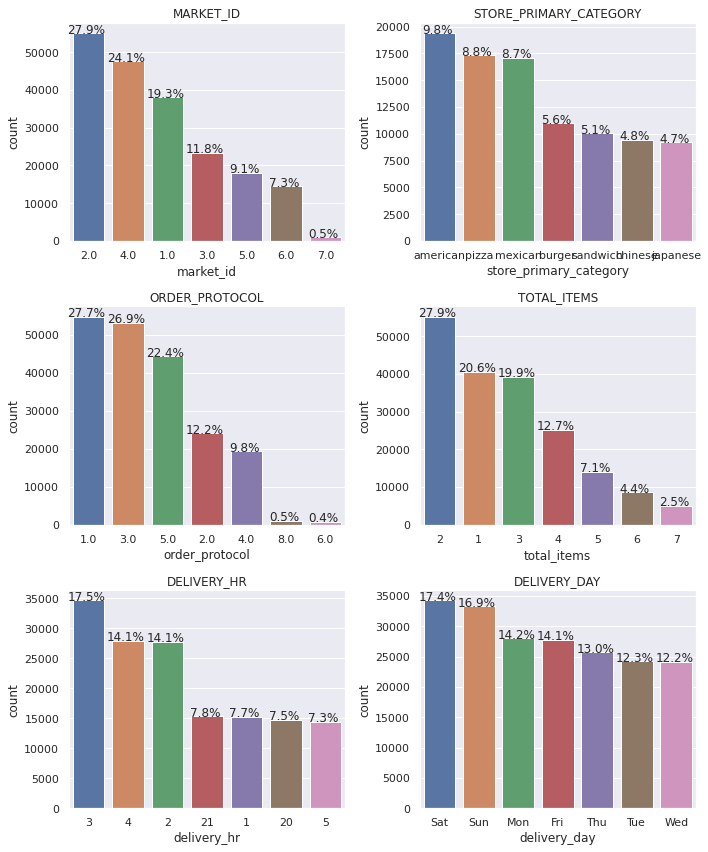

In [22]:
# Function to gnenrate countplot for categorical features:

cat_cols=['market_id','store_primary_category','order_protocol',
          'total_items','delivery_hr','delivery_day']

plt.figure(figsize=(10,12))
sns.set(style='darkgrid')

for i, variable in enumerate(cat_cols):
    plt.subplot(3,2,i+1)
    ax=sns.countplot(x=df[variable], data=df,  
                     order=df[variable].value_counts(ascending=False).iloc[:7].index)
    
    for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(cat_cols[i].upper()) 
                             
    

**Observation from countplot**
<br>
1. Market id 2 has the largest proportion of orders
2. Mostly, fast food and international cuisine is prefered by the customers
3. Order protocol 1,3 and 5 respectively are the most active ones
4. Majority of the orders contain less than 5 items
5. Surprisingly, large number of orders are placed at early mornings and late night
6. Weekends account for busiest days wrto orders placed

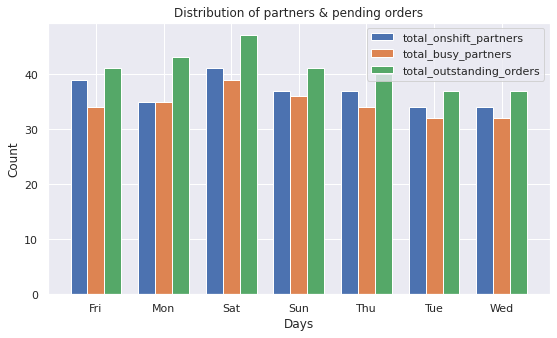

In [23]:
# Distribution of partners and pending orders
df_eda1 = df.groupby(by='delivery_day').median()[['total_onshift_partners','total_busy_partners',
                                                'total_outstanding_orders']].reset_index()

X = df_eda1['delivery_day']
  
ind = np.arange(len(X))
width = 0.25

plt.figure(figsize=(9,5))

plt.bar(ind, df_eda1['total_onshift_partners'], width, label = 'total_onshift_partners')
plt.bar(ind+width, df_eda1['total_busy_partners'], width, label = 'total_busy_partners')
plt.bar(ind+width*2, df_eda1['total_outstanding_orders'], width, label = 'total_outstanding_orders')
  
plt.xticks(ind+width, X)
plt.xlabel("Days")
plt.ylabel("Count")
plt.title("Distribution of partners & pending orders")
plt.legend()
plt.show()

**Observations**
<br>
1. Total outstanding orders are always greater than count of available partners
2. Highest outstanding orders are seen on weekends
3. Most of the manpower resources are nearly fully used as count of busy partners and total partners are almost equal
4. However, on Fridays there is a difference between manpower requirement and demand

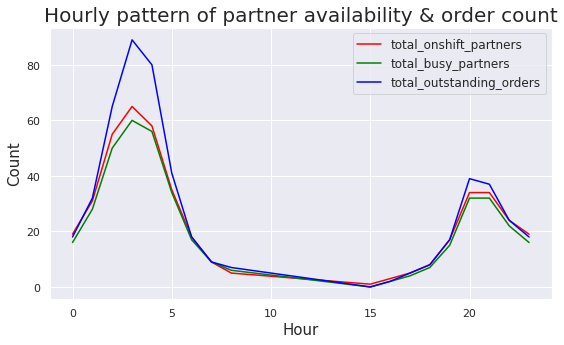

In [24]:
# Hourly pattern of orders & partner availability:

df_eda3 = df.groupby(by='delivery_hr').median()[['total_onshift_partners','total_busy_partners',
                                                'total_outstanding_orders']].reset_index()

plt.figure(figsize=(9,5))

sns.lineplot(data=df_eda3,x=df_eda3['delivery_hr'],y=df_eda3['total_onshift_partners'],
             color='red', label='total_onshift_partners')

sns.lineplot(data=df_eda3,x=df_eda3['delivery_hr'],y=df_eda3['total_busy_partners'],
             color='green', label='total_busy_partners')

sns.lineplot(data=df_eda3,x=df_eda3['delivery_hr'],y=df_eda3['total_outstanding_orders'],
             color='blue', label='total_outstanding_orders')

plt.legend(prop={'size':12})
plt.title("Hourly pattern of partner availability & order count", fontsize = 20)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

**Observation**
<br>
1. Highest outstanding orders can be observed during 0-5 hours and post 20 hour (early morning and late night)
2. In these hours, there is lack of manpower
3. During remaining hours supply and demand of partners are met correctly


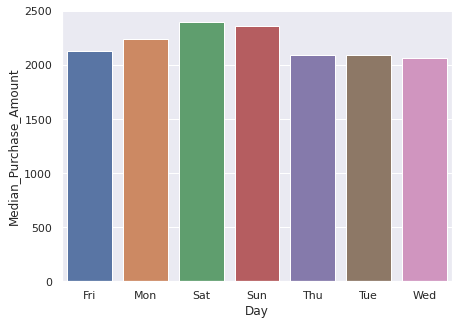

In [25]:
# Median purchase amount per day:

# Grouping on the basis of day and subtotal
df_eda2 = df.groupby(by='delivery_day').median()['subtotal'].reset_index()

# Plotting
plt.figure(figsize=(7,5))
sns.barplot(data=df_eda2, x='delivery_day', y='subtotal')

plt.xlabel('Day')
plt.ylabel('Median_Purchase_Amount')
plt.show()

### 5. Creating target feature (time taken for delivery) <a id='target'></a>

In [26]:
df['time_taken_min']=df['actual_delivery_time']-df['created_at']
df['time_taken_min']=df['time_taken_min'].astype('timedelta64[m]')

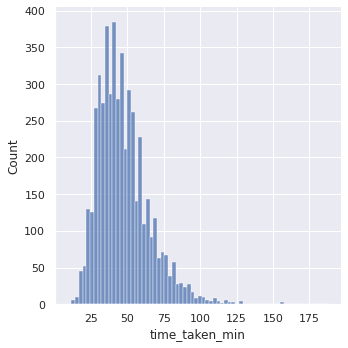

In [27]:
# Distplot

sns.displot(df['time_taken_min'].sample(5000))
plt.show()

**Observation**
<br>
- Large value of delivery time can be observed
- Such outliers needs to be handled

In [28]:
df['time_taken_min'].describe()

count    197347.000000
mean         47.974725
std         320.552847
min           1.000000
25%          35.000000
50%          44.000000
75%          56.000000
max      141947.000000
Name: time_taken_min, dtype: float64

**5.1 Removing outliers - 'time_taken_min' <a id='outliers_target'></a>**

In [29]:
q5=df['time_taken_min'].quantile(0.9999)
df = df[df['time_taken_min']<q5]

**5.2 Visualization based on delivery time <a id='del_vis'></a>**

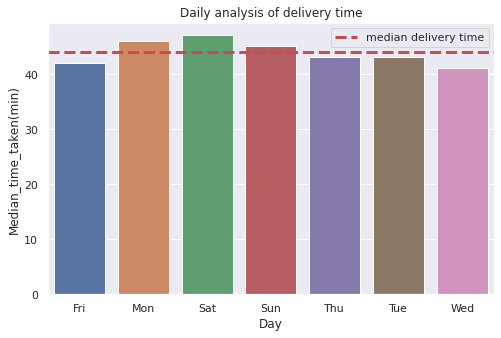

In [30]:
# Median delivery time per day:

# Grouping on the basis of day and delivery time
df_eda4 = df.groupby(by='delivery_day').median()['time_taken_min'].reset_index()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(data=df_eda4, x='delivery_day', y='time_taken_min')
plt.axhline(y=df['time_taken_min'].median(), color='r', 
            linestyle='--',linewidth=3, label='median delivery time')

plt.xlabel('Day')
plt.ylabel('Median_time_taken(min)')
plt.title('Daily analysis of delivery time')
plt.legend()
plt.show()

**Observation**
<br>
1. During weekends, median delivery time is higher than the median value
2. Weekdays have below median delivery time requirement
3. Shortest delivery period is observed on Wednesday

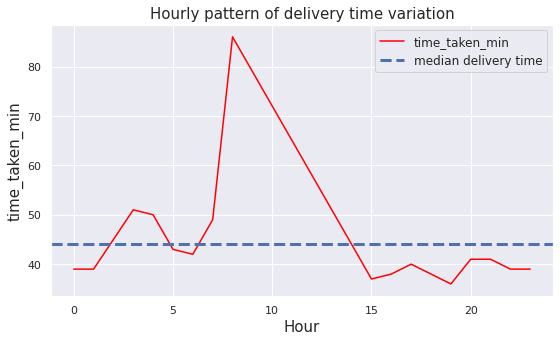

In [31]:
# Median delivery time per hour:

# Grouping on the basis of hour and delivery time
df_eda5 = df.groupby(by='delivery_hr').median()['time_taken_min'].reset_index()

# Plotting
plt.figure(figsize=(9,5))

sns.lineplot(data=df_eda5,x=df_eda5['delivery_hr'],y=df_eda5['time_taken_min'],
             color='red', label='time_taken_min')

plt.axhline(y=df['time_taken_min'].median(), color='b', 
            linestyle='--',linewidth=3, label='median delivery time')

plt.legend(prop={'size':12})
plt.title("Hourly pattern of delivery time variation", fontsize = 15)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("time_taken_min", fontsize = 15)
plt.show()

**Observation**
<br>
1. In the early morning, i.e before 5AM, delivery time is little above the median value
2. Post 5AM, till the afternoon, delivery time is very high
3. Evening orders has the shortest delivery period

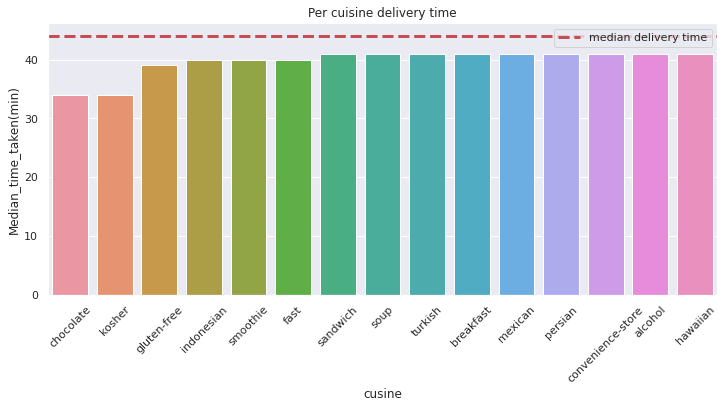

In [32]:
# Fastest delivered items

df_eda6 = df.groupby(by='store_primary_category').median()['time_taken_min'].reset_index().sort_values(by='time_taken_min',
                                                                                                       ascending=True)
plt.figure(figsize=(12,5))

sns.barplot(data=df_eda6.head(15), x='store_primary_category', y='time_taken_min')
plt.axhline(y=df['time_taken_min'].median(), color='r', 
            linestyle='--',linewidth=3, label='median delivery time')

plt.xlabel('cusine')
plt.ylabel('Median_time_taken(min)')
plt.title('Per cuisine delivery time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 6. Splitting data <a id='data_split'></a>

In [33]:
Y=df['time_taken_min']
X=df[df.columns.drop('time_taken_min')]


In [34]:
# Replacing day name with number
X.replace({'delivery_day':{"Mon" :0,
                           "Tue" :1,
                           "Wed":2,
                           "Thu":3,
                           "Fri":4,
                           "Sat":5,
                           "Sun":6  }}, inplace=True)

# Replacing month name with number
X.replace({'delivery_month':{"Jan" : 1,
                             "Feb" : 2}}, inplace=True)

In [35]:
# Dropping date based columns
X.drop(columns=['created_at','actual_delivery_time'],inplace=True)

**6.1 Test-Train split <a id='t_t_split'></a>**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,  random_state=33)

In [37]:
print( f"Sizes of the set created are: \n*Training set:{X_train.shape[0]}\n*Testing set:{X_test.shape[0]}")

Sizes of the set created are: 
*Training set:132209
*Testing set:65118


**6.2 Frequency encoding non-numerical features(Training & Testing) <a id='freq_enc'></a>**

**Frequency encoding non-numerical features(Training)**

In [38]:
# encoding 'store_id'
store_id_enc = X_train.groupby(by='store_id').size()/len(X_train)
X_train['store_id'] = X_train['store_id'].apply(lambda x:store_id_enc[x])

# encoding 'store_primary_category'
store_primary_category_enc = X_train.groupby(by='store_primary_category').size()/len(X_train)
X_train['store_primary_category'] = X_train['store_primary_category'].apply(lambda x:store_primary_category_enc[x])

**Frequency encoding non-numerical features(Testing)**

In [39]:
# encoding 'store_id'
store_id_enc = X_test.groupby(by='store_id').size()/len(X_test)
X_test['store_id'] = X_test['store_id'].apply(lambda x:store_id_enc[x])

# encoding 'store_primary_category'
store_primary_category_enc = X_test.groupby(by='store_primary_category').size()/len(X_test)
X_test['store_primary_category'] = X_test['store_primary_category'].apply(lambda x:store_primary_category_enc[x])

### 7. Model building - Random Forest <a id='mod_rf'></a>

In [40]:
rf = RandomForestRegressor(random_state=3, n_jobs=-1)

In [41]:
rf.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1, random_state=3)

In [42]:
# Predicting the Test set results
Y_pred = rf.predict(X_test)

**7.1 Evaluation of Random Forest model <a id='rf_eval'></a>**

In [59]:
# Calculating MSE
mse_rf = mse(Y_test, Y_pred) 

# Calculating RMSE
rmse_rf = np.sqrt(mse(Y_test, Y_pred))

# Calculating MAPE
mape_rf = mape(Y_test, Y_pred)

# Calculating MAE
mae_rf = mae(Y_test, Y_pred)

# Preparing the dataframe
rf_metrics = pd.DataFrame({'Metric':['MSE','RMSE','MAPE','MAE'],
                             'Value':[mse_rf,rmse_rf,mape_rf,mae_rf]})
rf_metrics.set_index('Metric',inplace=True)                    
rf_metrics

,Value
Metric,
MSE,151.831165
RMSE,12.321979
MAPE,0.224188
MAE,9.427806


### 8. Regression with neural networks <a id='nn_reg'></a>

**8.1 Creating training & testing dataset for NN <a id='nn_t_t'></a>**

In [46]:
X_train_nn = X_train.copy()
X_test_nn = X_test.copy()

Y_train_nn = Y_train.copy()
Y_test_nn = Y_test.copy()

**8.2 Encoding numerical categorical features <a id='nn_enc'></a>**

**Frequency encoding for numerical categorical features(train set)**

In [47]:
# encoding 'market_id'
market_id_enc = X_train_nn.groupby(by='market_id').size()/len(X_train_nn)
X_train_nn['market_id'] = X_train_nn['market_id'].apply(lambda x:market_id_enc[x])

# encoding 'order_protocol'
order_protocol_enc = X_train_nn.groupby(by='order_protocol').size()/len(X_train_nn)
X_train_nn['order_protocol'] = X_train_nn['order_protocol'].apply(lambda x:order_protocol_enc[x])

# encoding 'created_hr'
created_hr_enc = X_train_nn.groupby(by='created_hr').size()/len(X_train_nn)
X_train_nn['created_hr'] = X_train_nn['created_hr'].apply(lambda x:created_hr_enc[x])

# encoding 'delivery_hr'
delivery_hr_enc = X_train_nn.groupby(by='delivery_hr').size()/len(X_train_nn)
X_train_nn['delivery_hr'] = X_train_nn['delivery_hr'].apply(lambda x:delivery_hr_enc[x])

# encoding 'delivery_year'
delivery_year_enc = X_train_nn.groupby(by='delivery_year').size()/len(X_train_nn)
X_train_nn['delivery_year'] = X_train_nn['delivery_year'].apply(lambda x:delivery_year_enc[x])

# encoding 'created_year'
created_year_enc = X_train_nn.groupby(by='created_year').size()/len(X_train_nn)
X_train_nn['created_year'] = X_train_nn['created_year'].apply(lambda x:created_year_enc[x])

# encoding 'delivery_month'
delivery_month_enc = X_train_nn.groupby(by='delivery_month').size()/len(X_train_nn)
X_train_nn['delivery_month'] = X_train_nn['delivery_month'].apply(lambda x:delivery_month_enc[x])

# encoding 'created_month'
created_month_enc = X_train_nn.groupby(by='created_month').size()/len(X_train_nn)
X_train_nn['created_month'] = X_train_nn['created_month'].apply(lambda x:created_month_enc[x])

# encoding 'delivery_date'
delivery_date_enc = X_train_nn.groupby(by='delivery_date').size()/len(X_train_nn)
X_train_nn['delivery_date'] = X_train_nn['delivery_date'].apply(lambda x:delivery_date_enc[x])

# encoding 'created_date'
created_date_enc = X_train_nn.groupby(by='created_date').size()/len(X_train_nn)
X_train_nn['created_date'] = X_train_nn['created_date'].apply(lambda x:created_date_enc[x])

# encoding 'delivery_day'
delivery_day_enc = X_train_nn.groupby(by='delivery_day').size()/len(X_train_nn)
X_train_nn['delivery_day'] = X_train_nn['delivery_day'].apply(lambda x:delivery_day_enc[x])

# encoding 'created_day'
created_day_enc = X_train_nn.groupby(by='created_day').size()/len(X_train_nn)
X_train_nn['created_day'] = X_train_nn['created_day'].apply(lambda x:created_day_enc[x])



**Frequency encoding for numerical categorical features(test set)**

In [48]:
# encoding 'market_id'
market_id_enc = X_test_nn.groupby(by='market_id').size()/len(X_test_nn)
X_test_nn['market_id'] = X_test_nn['market_id'].apply(lambda x:market_id_enc[x])

# encoding 'order_protocol'
order_protocol_enc = X_test_nn.groupby(by='order_protocol').size()/len(X_test_nn)
X_test_nn['order_protocol'] = X_test_nn['order_protocol'].apply(lambda x:order_protocol_enc[x])

# encoding 'created_hr'
created_hr_enc = X_test_nn.groupby(by='created_hr').size()/len(X_test_nn)
X_test_nn['created_hr'] = X_test_nn['created_hr'].apply(lambda x:created_hr_enc[x])

# encoding 'delivery_hr'
delivery_hr_enc = X_test_nn.groupby(by='delivery_hr').size()/len(X_test_nn)
X_test_nn['delivery_hr'] = X_test_nn['delivery_hr'].apply(lambda x:delivery_hr_enc[x])

# encoding 'delivery_year'
delivery_year_enc = X_test_nn.groupby(by='delivery_year').size()/len(X_test_nn)
X_test_nn['delivery_year'] = X_test_nn['delivery_year'].apply(lambda x:delivery_year_enc[x])

# encoding 'created_year'
created_year_enc = X_test_nn.groupby(by='created_year').size()/len(X_test_nn)
X_test_nn['created_year'] = X_test_nn['created_year'].apply(lambda x:created_year_enc[x])

# encoding 'delivery_month'
delivery_month_enc = X_test_nn.groupby(by='delivery_month').size()/len(X_test_nn)
X_test_nn['delivery_month'] = X_test_nn['delivery_month'].apply(lambda x:delivery_month_enc[x])

# encoding 'created_month'
created_month_enc = X_test_nn.groupby(by='created_month').size()/len(X_test_nn)
X_test_nn['created_month'] = X_test_nn['created_month'].apply(lambda x:created_month_enc[x])

# encoding 'delivery_date'
delivery_date_enc = X_test_nn.groupby(by='delivery_date').size()/len(X_test_nn)
X_test_nn['delivery_date'] = X_test_nn['delivery_date'].apply(lambda x:delivery_date_enc[x])

# encoding 'created_date'
created_date_enc = X_test_nn.groupby(by='created_date').size()/len(X_test_nn)
X_test_nn['created_date'] = X_test_nn['created_date'].apply(lambda x:created_date_enc[x])

# encoding 'delivery_day'
delivery_day_enc = X_test_nn.groupby(by='delivery_day').size()/len(X_test_nn)
X_test_nn['delivery_day'] = X_test_nn['delivery_day'].apply(lambda x:delivery_day_enc[x])

# encoding 'created_day'
created_day_enc = X_test_nn.groupby(by='created_day').size()/len(X_test_nn)
X_test_nn['created_day'] = X_test_nn['created_day'].apply(lambda x:created_day_enc[x])



**8.3 Scaling the data <a id='nn_scl'></a>**

In [49]:
# Standardising training data

scaler = StandardScaler()
scaler.fit(X_train_nn)
X_train_nn = scaler.transform(X_train_nn)

In [50]:
# Standardising testing data

scaler.fit(X_test_nn)
X_test_nn = scaler.transform(X_test_nn)

**8.4 Model building - NN <a id='nn_model'></a>**

In [51]:
class VerboseCallback(tf.keras.callbacks.Callback):
  
  # Functions to provide verbose
  def on_train_begin(self, logs=None):
    print("Starting the training...")
  def on_epoch_end(self, epoch, logs=None):
    if epoch % 50 == 0:
      print(f"Epoch: {str(epoch).zfill(3)}, Loss: {logs['loss']}")
  def on_train_end(self, logs=None):
    print("Finished the training")

# Function to create the model
def create_model():
    model = Sequential([
                    Dense(256, activation="relu", input_shape=(22,), name="hidden_1"), # Layer- 1
                    Dense(128, activation="relu", input_shape=(22,), name="hidden_2"), # Layer- 2
                    Dense(64, activation="relu", name="hidden_3"),                     # Layer- 3
                    Dense(32, activation="relu", name="hidden_4"),                     # Layer- 4
                    Dense(1,name="output")])
    
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),   #Optimised using ADAM
    loss = tf.keras.losses.MeanAbsoluteError(),                  # Loss function : MAE   
    metrics=[tf.keras.metrics.MeanAbsoluteError(),               # Metrics evaluated : MAE, MAPE, MSLE
             tf.keras.metrics.MeanAbsolutePercentageError(),
             tf.keras.metrics.MeanSquaredLogarithmicError()])
    return model
model = create_model()
history = model.fit(X_train_nn, Y_train_nn, epochs=500,       # Fitting the model
          batch_size=256, validation_split=0.1,               # epochs- 500, batchsize : 256
          verbose = 0, callbacks = [VerboseCallback()])


Starting the training...
Epoch: 000, Loss: 14.05633544921875
Epoch: 050, Loss: 10.017845153808594
Epoch: 100, Loss: 9.280176162719727
Epoch: 150, Loss: 8.803958892822266
Epoch: 200, Loss: 8.426103591918945
Epoch: 250, Loss: 8.123640060424805
Epoch: 300, Loss: 7.909106254577637
Epoch: 350, Loss: 7.723560810089111
Epoch: 400, Loss: 7.568424224853516
Epoch: 450, Loss: 7.433933258056641
Finished the training


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 256)               5888      
                                                                 
 hidden_2 (Dense)            (None, 128)               32896     
                                                                 
 hidden_3 (Dense)            (None, 64)                8256      
                                                                 
 hidden_5 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


**8.5 NN Model architecture <a id='nn_arch'></a>**

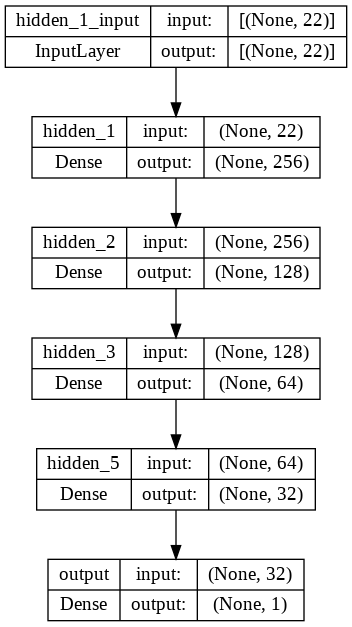

In [53]:
# architecture of the NN

plot_model(model, show_shapes = True)

**8.6 NN Model evaluation <a id='nn_eval'></a>**

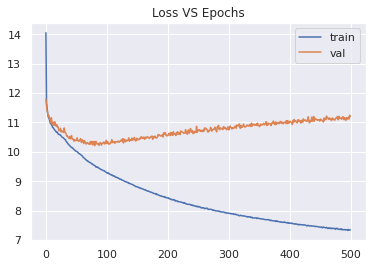

In [57]:
# Evaluating the performance

epochs = history.epoch
loss = history.history["loss"]

val_loss = history.history["val_loss"]

plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

**Observations**
<br>
- It can be observed that, after nearly 100 observations, though training loss decreases, validation loss increases
<br>
- This indicates that the model is getting over fitted

**8.7 NN Model prediction <a id='nn_pred'></a>**

In [61]:
# Predictions of NN
Y_pred_nn = model.predict(X_test_nn)
Y_pred_nn

2035/2035 [==============================] - 7s 3ms/step


array([[29.177525],
       [53.328136],
       [31.26821 ],
       ...,
       [38.0668  ],
       [45.96549 ],
       [44.36188 ]], dtype=float32)

**8.8 Comparison of RF and NN model <a id='comp'></a>**

In [63]:
# Evaluation metrics of NN

# Calculating MSE
mse_nn = mse(Y_test_nn, Y_pred_nn) 

# Calculating RMSE
rmse_nn = np.sqrt(mse(Y_test_nn, Y_pred_nn))

# Calculating MAPE
mape_nn = mape(Y_test_nn, Y_pred_nn)

# Calculating MAE
mae_nn = mae(Y_test_nn, Y_pred_nn)

# Preparing the dataframe
metrics_comp = pd.DataFrame({'Model':['RF','NN'],
                             'MSE':[mse_rf,mse_nn],
                           'RMSE':[rmse_rf,rmse_nn],
                           'MAPE':[mape_rf,mape_nn],
                           'MAE':[mae_rf,mae_nn]})
metrics_comp.set_index('Model',inplace=True)                    
metrics_comp.T

Model,RF,NN
MSE,151.831165,247.580440
RMSE,12.321979,15.734689
MAPE,0.224188,0.256764
MAE,9.427806,11.350354


**Observations**
<br>
- RF performs slightly better than NN 
- Performance of NN, though was superior in training, deteriorated with testing data
- With proper hyperparameter tuning, the performance of NN model can be improved further
- Due to technical difficulties and long training  duration further hyperparameter tuning could not be done

### 9. Insights & Recommendations <a id='ins_rec'></a>


---
### Insights:
<br>
1. Market id : 2 has the largest proportion of orders
<br>
2. Irrespective of the day, American cuisine is most ordered than any other cuisine
<br>
3. Contrastingly, most offered cuisines doesnot fall into the category of the fastest delivered ones(except Mexican)
<br>
4. 3 order protocols controls more than 50% of the total orders
<br>
5. Majority orders has a cart size of 3 and lesser items
<br>
6. Large number of orders can be seen placed in early morning hours (before 5AM) and late niht
<br>
7. Interms of days, weekends and Monday experience heavy order traffic
<br>
8. During Fridays, manpower can be better utilized as total onshift partners is far greater than total busy partners
<br>
9. Spending pattern is generally during weekend and other days follow a static pattern
<br>
10. Due to weekend rush, delivery time spikes during these times
<br>
11. Day time (5AM to 3PM) experience longer waiting period (reason may be due to the traffic)


==========================================================================================
<br>

### Recommendations
<br>
1. Focus more on market-id which have weaker sales
<br>
2. During weekdays(non rush periods), more offers should be provided to high demand items(eg. fastfood, American)
<br>
3. Instead of stressing more on limited cuisines, more variety should be given for the customers and they should be encouraged to try them
<br>
4. List of cuisines which  have lower than median delivery time should be explicitly mentioned to the customers(eg. Mexican, breakfast items etc.)
<br>
5. Providing a recommeder system with weightage given to faster delivered items and avg. customer rating can improve per order item count
<br>
6. Restaurant should be also shared with the order traffic forecast, so that they can be prepared accordingly(especially during early morning and late night)
<br>
7. Adding more delivery partners during Saturdays & Mondays can reduce outstanding deliveries load 
<br>
8. To speed up the delivery during peak hours, better renumeration should be provided during these hours
<br>
9. Customers should be encouraged to spend more on weekdays in terms of offers & promotions



---
**Leading Questions:**

**1.Defining the problem statements and where can this and modifications of this be used?**
<br>
Ans. - Help Porter to predict delivery time based on various features
<br>
- Perform detailed analysis inorder to identify the impact of different factors
<br>
- Thereby, to improve the customer experience and business, by optimising aspects such as delivery time and manpower requirement
<br> 

**2. List 3 functions the pandas datetime provides with one line explanation.**
<br>
Ans
- dt.year : to extract the year
- dt.month : to extract the month
- dt.day : to extract the date
<br>

**3. Short note on datetime, timedelta, time span (period)**
<br>
Ans.
- datetime - The datetime module supplies classes for manipulating dates and times.
- timedelta - Used for calculating difference in dates
- timespan - Timespans allow to check if a timestamp falls within a specified list of boundaries
<br>

**4.Why do we need to check for outliers in our data?**
<br>
Ans.
- affect the mean value of the data
- they represent measurement errors, data entry or processing errors, or poor sampling.
<br>

**5.Name 3 outlier removal methods?**
<br>
Ans.
- Standard Deviation Method
- Interquartile Range Method
- Automatic Outlier Detection
<br>

**6. What classical machine learning methods can we use other than random forest for regression?**
<br>
Ans
- Linear regression 
- Polynomial regression
- Decision Tree
- kNN
<br>

**7. Why is scaling required for neural networks?**
<br>
Ans.Having features on a similar scale will help the gradient descent converge more quickly towards the minima. Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by: It makes the training faster
<br>

**8. Briefly explain your choice of optimizer.**
<br>
Ans.
<br>
- Optimizer used:ADAM
- The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning
<br>

**9. Which activation function did you use and why?**
<br>
Ans.
- Activation function used is RELU
- ReLu tended to converge much more quickly and reliably than training a deep network with other activation functions
<br>

**10. Why does a neural network perform well on a large dataset?**
<br>
Ans.
- Large data helps to learn non linear boundaries very accurately
- Having more data increases the accuracy of NN model




### JMJ+